In [9]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [10]:
ticker = 'TXT'

mysql = Mysql()

In [11]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-30 14:00:00,25.840,26.89,26.535,26.060,0.000000,250387
1,2020-03-30 15:00:00,26.490,27.19,27.190,26.520,0.011157,160413
2,2020-03-30 16:00:00,26.820,27.54,27.120,27.195,0.012872,150369
3,2020-03-30 17:00:00,26.950,27.36,27.180,27.130,-0.006536,146082
4,2020-03-30 18:00:00,26.870,27.32,27.320,27.180,-0.001462,190547
...,...,...,...,...,...,...,...
2,2021-03-29 16:00:00,53.920,54.31,54.165,54.310,-0.003303,73002
3,2021-03-29 17:00:00,53.955,54.29,54.010,54.210,-0.000368,75609
4,2021-03-29 18:00:00,53.950,54.32,54.230,53.990,0.000553,81666


In [12]:
data = mysql.get_closes_by_symbol(ticker)

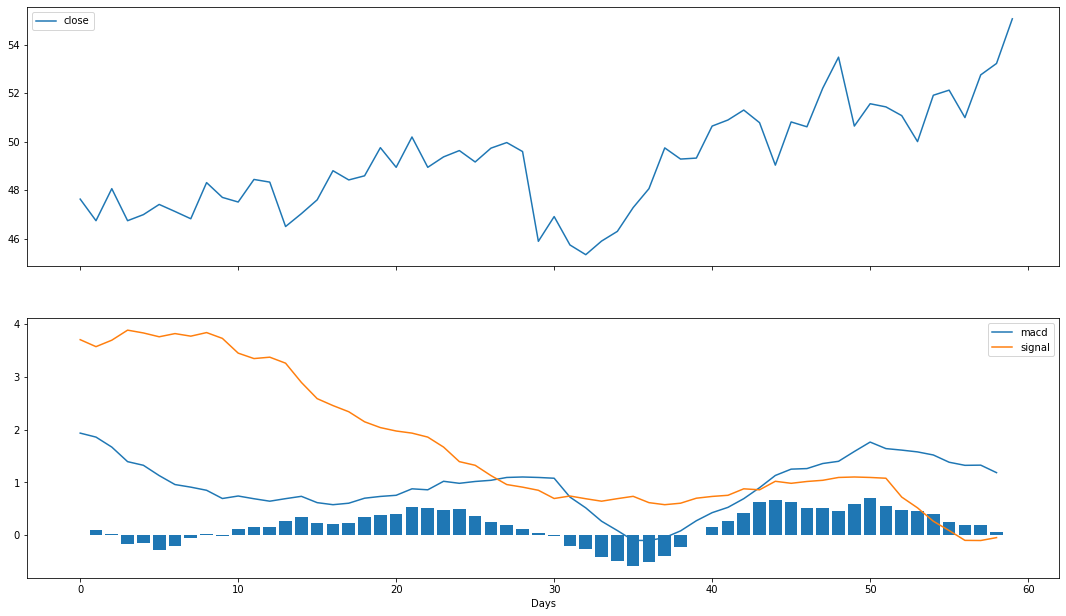

In [13]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

In [15]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

ZeroDivisionError: float division by zero